## Coverage of total tests, cases, deaths

## owi-covid-data.csv
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [ ]:
import requests
import json
import pandas as pd
import warnings
import csv
warnings.filterwarnings('ignore', category=UserWarning, message="Could not infer format")
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from datetime import date

import seaborn as sns
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.dates as mdates


#prendo le country che ho selezionato con facebook 
dl = pd.read_csv('csv/FULL_DATA3.csv')  
countries= dl['country'].unique().tolist()
dx=pd.read_csv('csv/full_data3_con_usa.csv') #per avere total_test degli usa

In [ ]:
dg = pd.read_csv('csv/owid-covid-data.csv') #qui non c'è il CHI
#dg.columns
dg.loc[dg['location'] == "Czechia", 'location'] = "Czech Republic"
dg= dg[dg['location'].isin(countries)]
dg['date'] = pd.to_datetime(dg['date'])
dg['date'] = dg['date'].dt.date
dg= dg[(dg['date'] >= date(2021, 5, 21)) & (dg['date'] <= date(2022, 6, 25))]
# voglio verificare che dg e df (quindi oxford e owi) usano lo stesso set di stringency index ->> sono uguali
#argentina_dg = dg[dg['location'] == 'Argentina']['stringency_index']  
#argentina_df = df[df['CountryName'] == 'Argentina']['StringencyIndex_Average']  
#print(argentina_df)
#print(argentina_dg)
dg_filtered= dg[['location', 'date', 'total_cases', 'total_tests','stringency_index' , 'total_deaths']]
#dg_filtered
country_nan= dg_filtered[dg_filtered['total_tests'].isna()]['location'].unique().tolist()
print(country_nan)

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Indonesia', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'Venezuela', 'Vietnam']


In [ ]:
# unisci i due DataFrame sulla chiave comune

dg_filtered2=dg_filtered.rename(columns={
    'location': 'country',
    'date': 'survey_date',
})
dx['survey_date'] = pd.to_datetime(dx['survey_date'])
dg_filtered2['survey_date'] = pd.to_datetime(dg_filtered2['survey_date'])
dg_filtered2=dg_filtered2[['country',	'survey_date',	'total_cases',	'total_tests']]
dx.set_index(["country", "survey_date"], inplace=True)
dg_filtered2.set_index(["country", "survey_date"], inplace=True)
dx.update(dg_filtered2[["total_cases", "total_tests"]]) # aggiorna solo le colonne presenti in df1
dx.reset_index(inplace=True)   # torna al formato originale
dg_filtered2.reset_index(inplace=True)

#dx ora contiene tutti i toal test e total cases del mondo più gli usa

In [ ]:
# Filtra e prepara i dati
dg_filtered_subset = dx[['country', 'survey_date', 'total_tests']].copy()
dg_filtered_subset['is_nan'] = dg_filtered_subset['total_tests'].isna().astype(int)

# Tabella pivot
pivot_table = dg_filtered_subset.pivot(index='country', columns='survey_date', values='is_nan')
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)


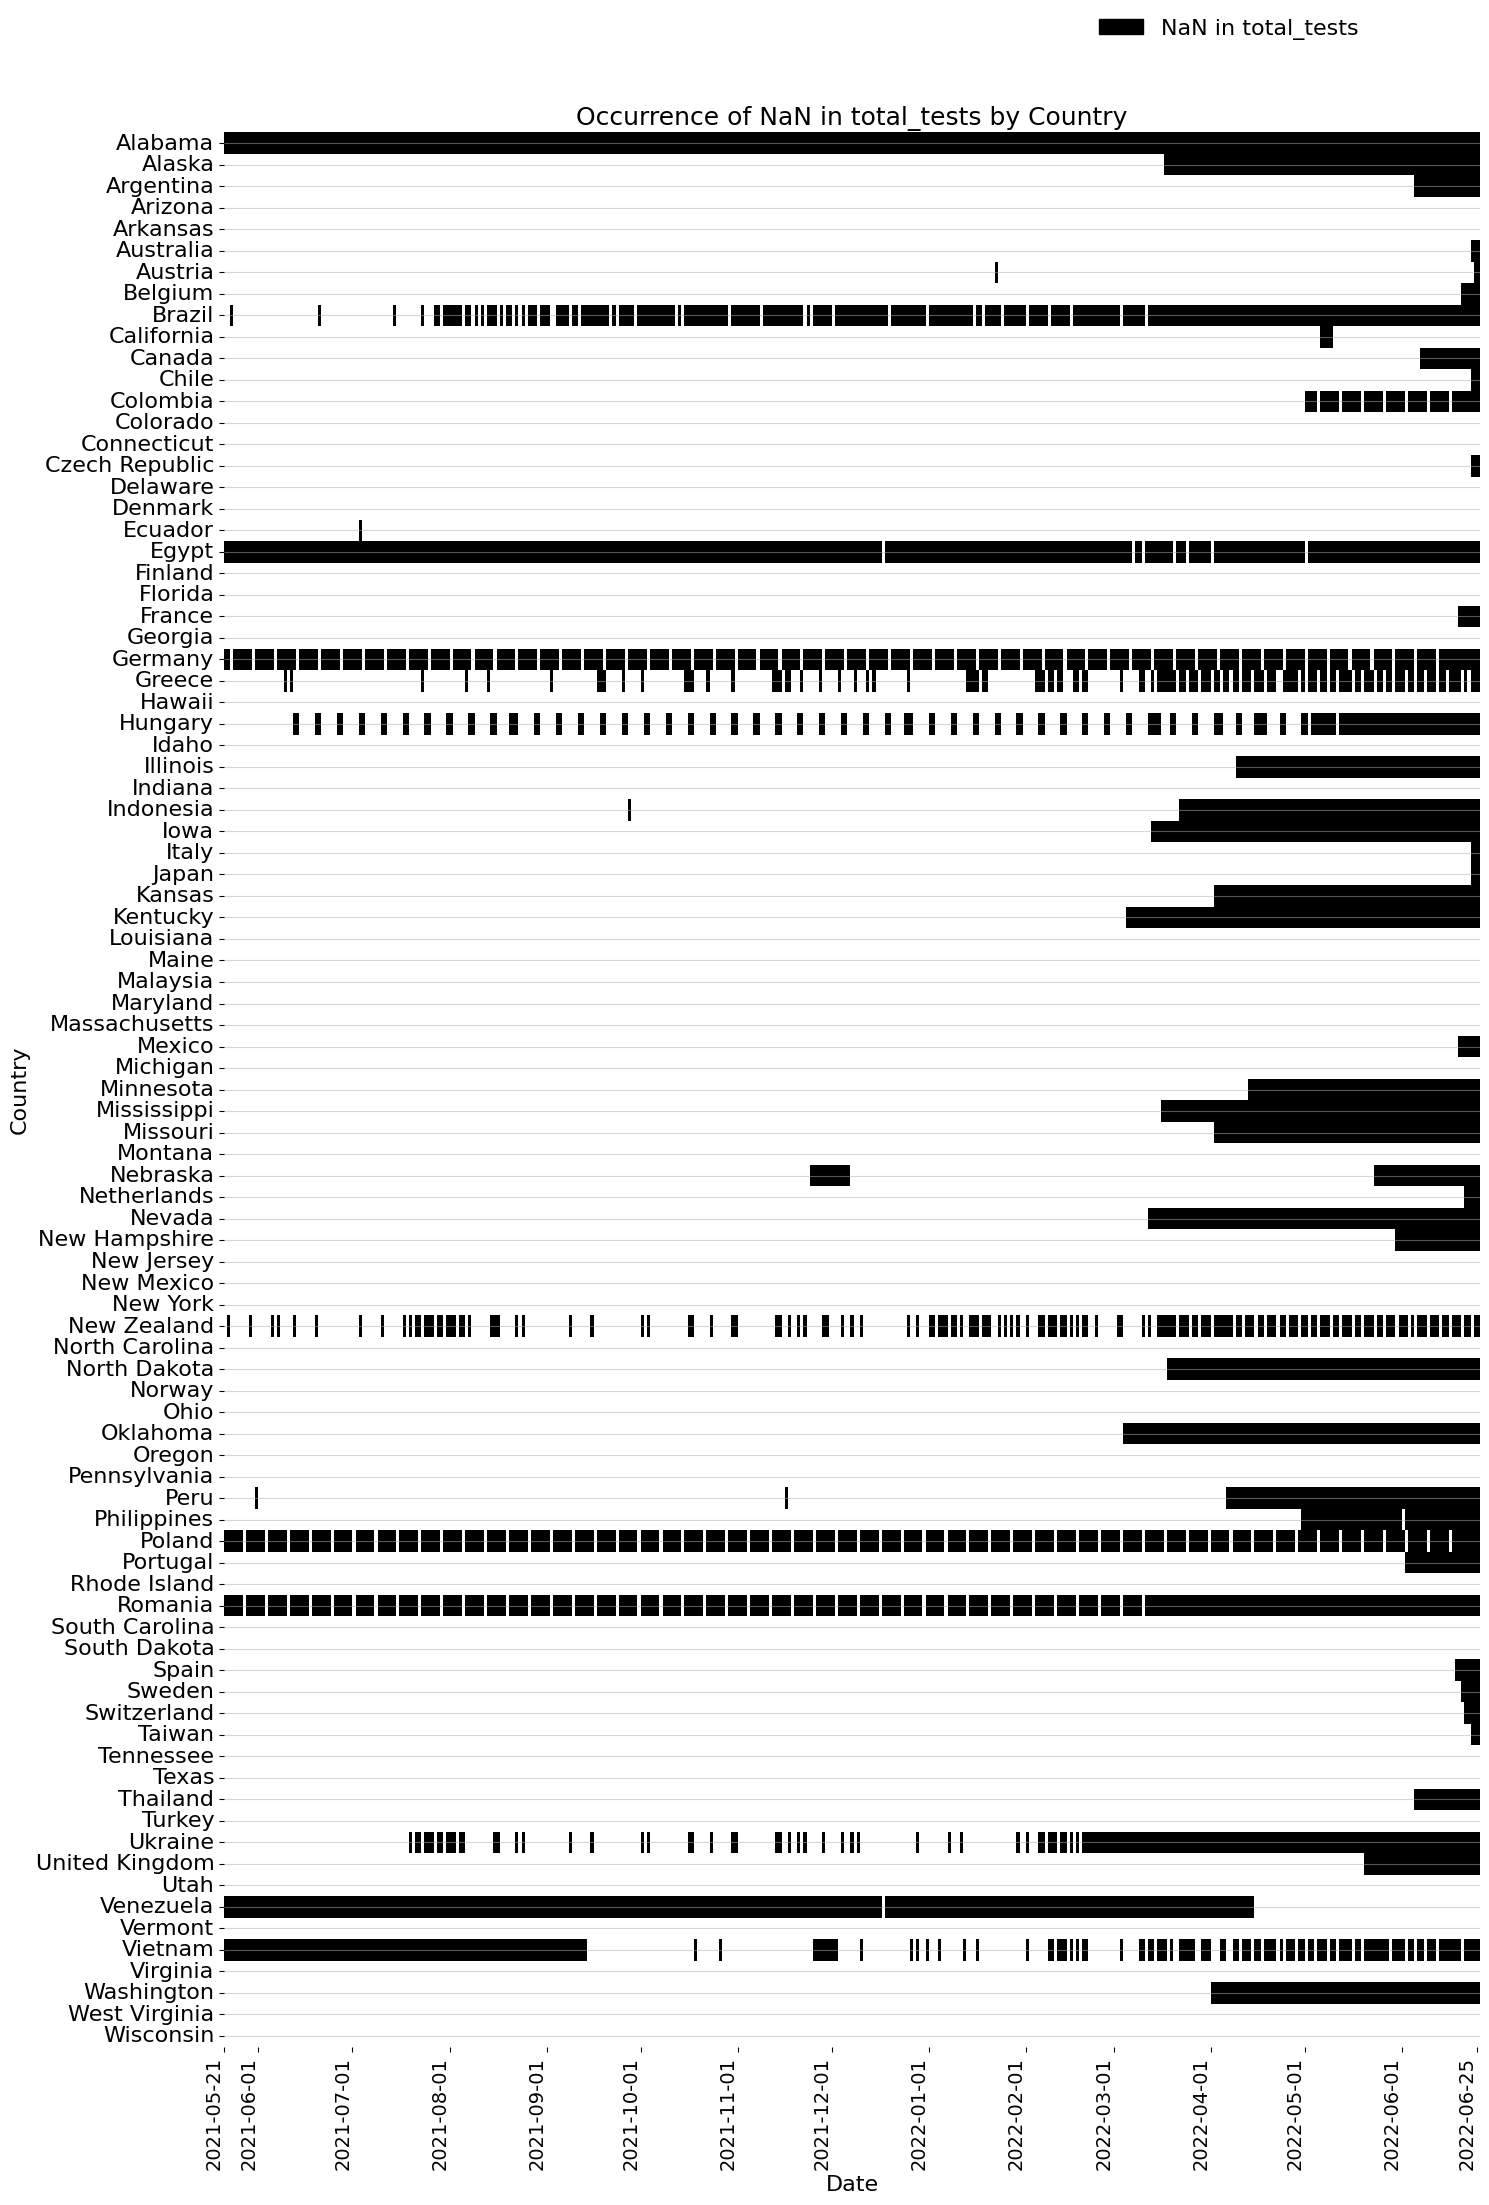

In [ ]:
plt.figure(figsize=(15, 22))
plt.rcParams['font.family'] = 'sans-serif' 
sns.heatmap(pivot_table, cmap='Greys', cbar=False)

legend_patch = Patch(color='black', label='NaN in total_tests')
plt.legend(handles=[legend_patch], loc='upper center', bbox_to_anchor=(0.80, 1.07), ncol=1, frameon=False, fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.title('Occurrence of NaN in total_tests by Country', fontsize=18)

# Seleziona solo una data per mese da mostrare sull'asse x + estremi
dates = pivot_table.columns
ticks = [i for i, date in enumerate(dates) if date.day == 1]
if 0 not in ticks:
    ticks.insert(0, 0)
if (len(dates) - 1) not in ticks:
    ticks.append(len(dates) - 1)

# etichette corrispondenti
labels = [dates[i].strftime('%Y-%m-%d') for i in ticks]

plt.xticks(ticks=ticks, labels=labels, fontsize=14,  ha='right')
plt.grid(True, axis='y', linestyle='-', alpha=0.5)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()


## total cases e total deaths 

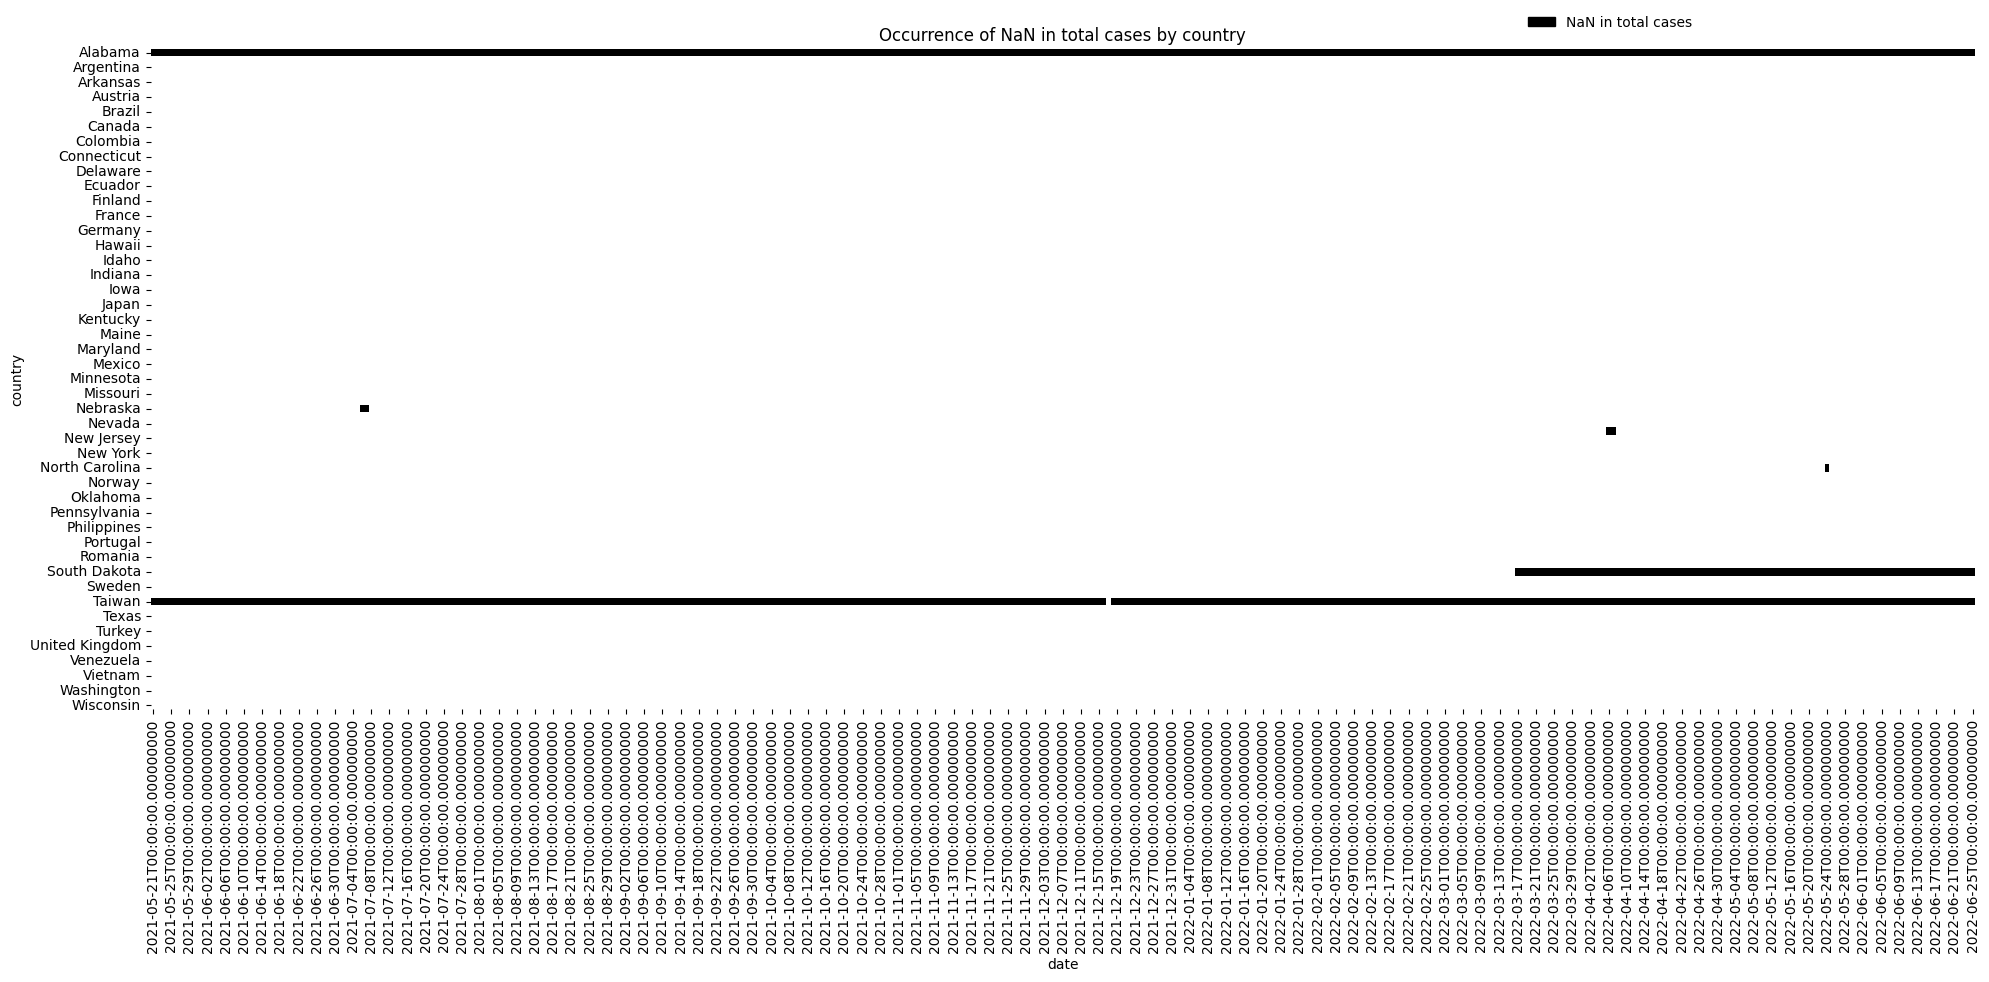

In [6]:
dg_filtere_subset = dx[['country', 'survey_date', 'total_cases']].copy()
dg_filtere_subset['is_nan'] = dg_filtere_subset['total_cases'].isna().astype(int)

p_table = dg_filtere_subset.pivot(index='country', columns='survey_date', values='is_nan')
p_table = p_table.reindex(sorted(p_table.columns), axis=1)

# Plot
plt.figure(figsize=(20, 10))
sns.heatmap(p_table, cmap='Greys', cbar=False)  # Disattiva la colorbar

legend_patch = Patch(color='black', label='NaN in total cases')
plt.legend(handles=[legend_patch], loc='upper center', bbox_to_anchor=(0.80, 1.07), ncol=1, frameon=False)
plt.xlabel('date')
plt.ylabel('country')
plt.title('Occurrence of NaN in total cases by country')
plt.tight_layout()
plt.show()

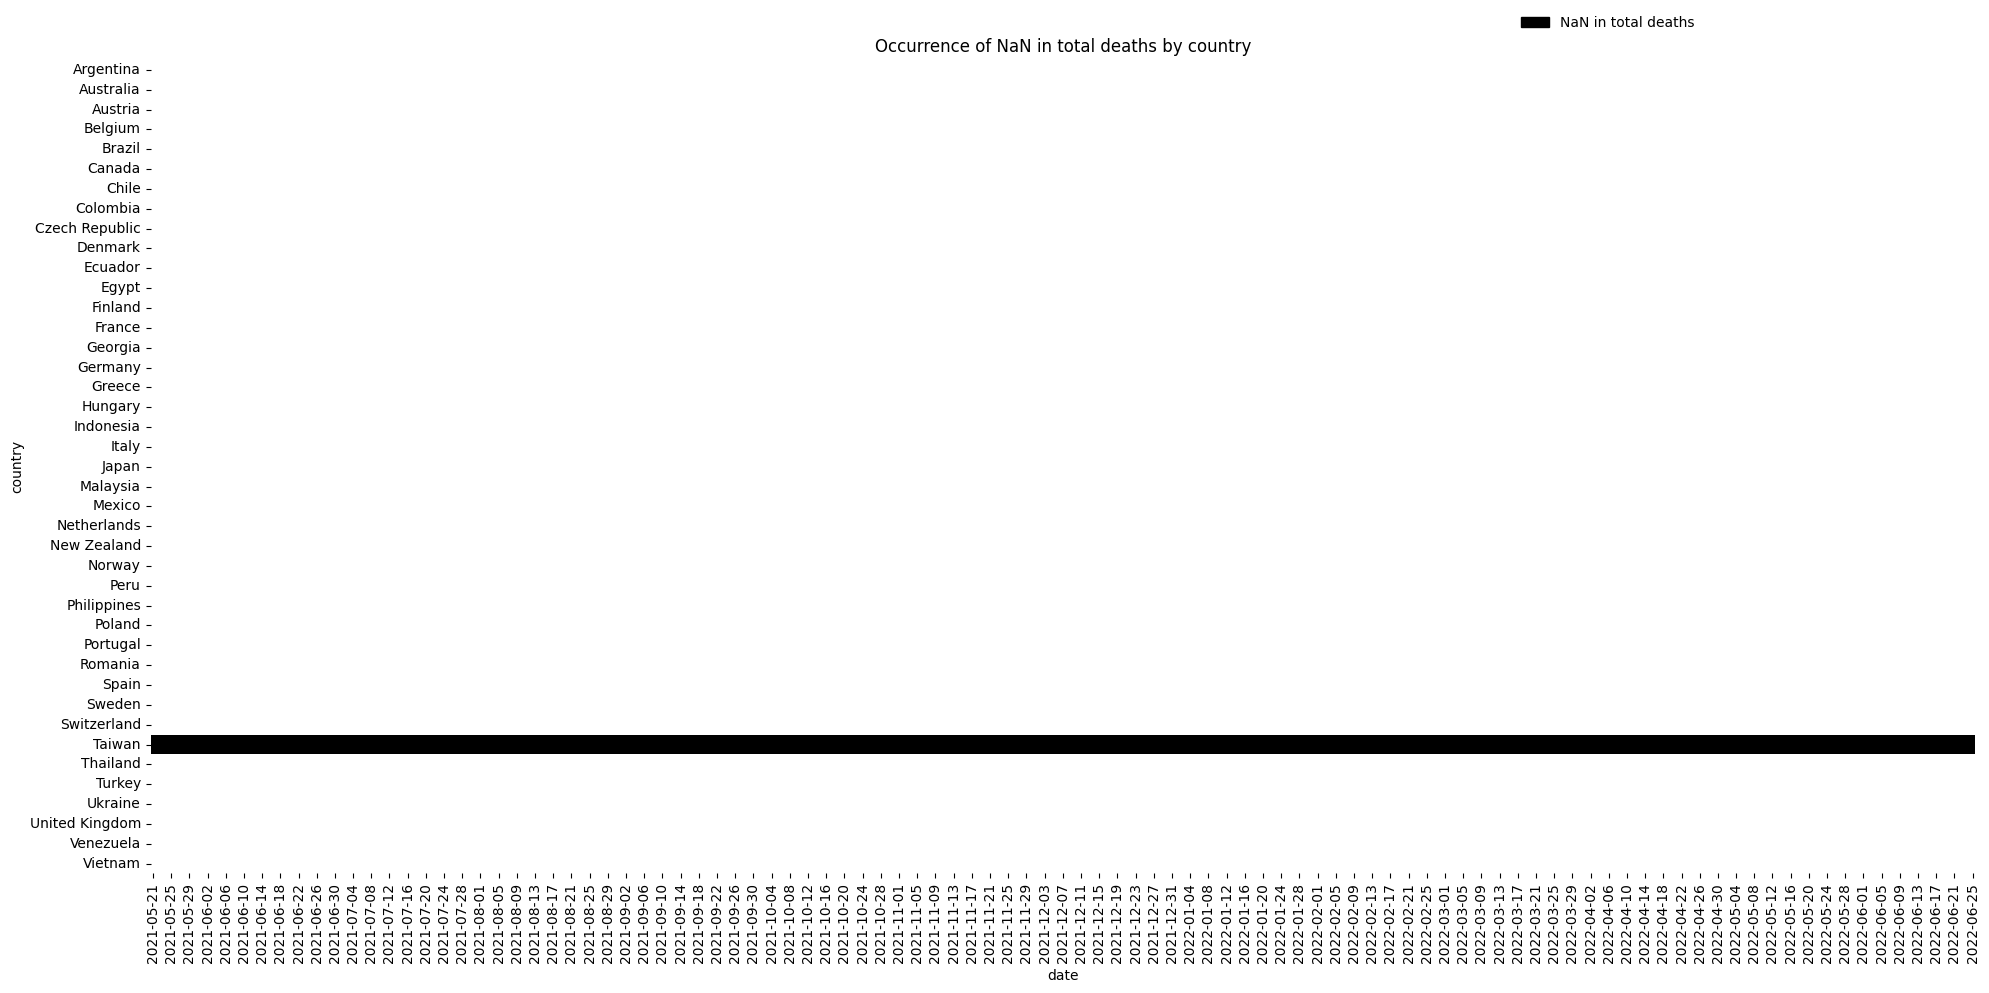

In [7]:
dg_filtere_subset = dg_filtered[['location', 'date', 'total_deaths']].copy()
dg_filtere_subset['is_nan'] = dg_filtere_subset['total_deaths'].isna().astype(int)

p_table = dg_filtere_subset.pivot(index='location', columns='date', values='is_nan')
p_table = p_table.reindex(sorted(p_table.columns), axis=1)

# Plot
plt.figure(figsize=(20, 10))
sns.heatmap(p_table, cmap='Greys', cbar=False)  # Disattiva la colorbar

legend_patch = Patch(color='black', label='NaN in total deaths ')
plt.legend(handles=[legend_patch], loc='upper center', bbox_to_anchor=(0.80, 1.07), ncol=1, frameon=False)
plt.xlabel('date')
plt.ylabel('country')
plt.title('Occurrence of NaN in total deaths by country')
plt.tight_layout()
plt.show()

In [ ]:
#deciso di eliminare i paesi che nel plot di tot_test, cases e deaths  hanno buchi troppo grandi di dati e quindi non c'è affidabilità. 
cut_list=['Brazil', 'Egypt', 'Ukraine', 'Venezuela', 'Vietnam', 'Taiwan']
# elimino la cut_list da FULL_DATA.csv
full_data = pd.read_csv("csv/FULL_DATA3.csv")
filtered_full_data = full_data[~full_data["country"].isin(cut_list)]
filtered_full_data.to_csv("csv/FULL_DATA4.csv", index=False)

CONSIDERO SHARE OF POSITIVE TEST PER CONFRONTARE CON I TOTAL TEST 

In [ ]:
cut_listt= ['Brazil',  'Ukraine', 'Vietnam']

dts = pd.read_csv('csv/positive-rate-daily-smoothed.csv')
dts= dts[dts['Entity'].isin(cut_listt)]
dts['Day'] = pd.to_datetime(dts['Day'])
dts['Day'] = dts['Day'].dt.date
dts= dts[(dts['Day'] >= date(2021, 5, 21)) & (dts['Day'] <= date(2022, 6, 25))]
dts

,Entity,Code,Day,COVID-19 positivity rate
13267,Brazil,BRA,2021-05-21,22.913519
13268,Brazil,BRA,2021-05-22,22.992847
13269,Brazil,BRA,2021-05-23,22.990140
13270,Brazil,BRA,2021-05-24,23.072788
13271,Brazil,BRA,2021-05-25,23.073670
...,...,...,...,...
99872,Vietnam,VNM,2022-04-24,58.438404
99873,Vietnam,VNM,2022-04-25,64.487300
99874,Vietnam,VNM,2022-04-26,72.334500
99875,Vietnam,VNM,2022-04-27,81.930910


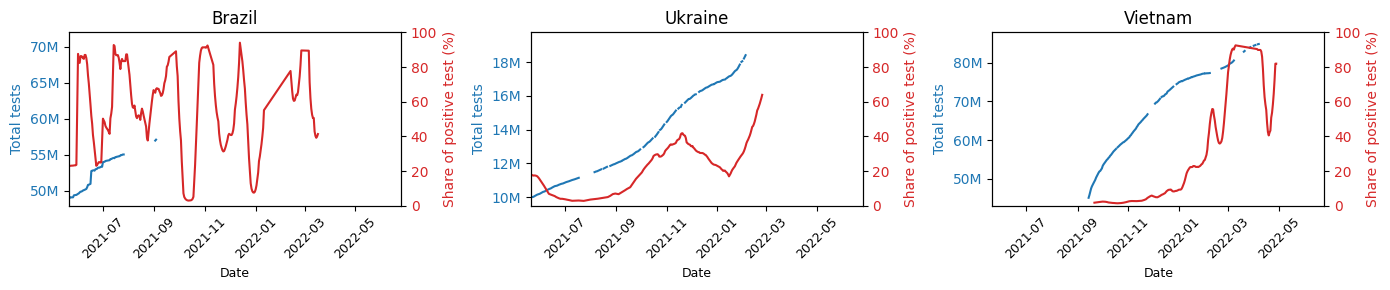

In [10]:
from matplotlib.ticker import FuncFormatter

def format_func(value, _):
    if value >= 1e6:
        return f"{int(value/1e6)}M"
    elif value >= 1e3:
        return f"{int(value/1e3)}K"
    return str(int(value))

# Crea una figura con subplots in una griglia (ad es. 2 righe x 2 colonne)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))  # Modifica nrows/ncols in base al numero di paesi
axs = axs.flatten()  # Appiattisci l'array di assi per iterare facilmente

for idx, country in enumerate(cut_listt[:5]):  # Mostra massimo 4 paesi (adatta al tuo caso)
    dg_country = dg[dg["location"] == country]
    dts_country = dts[dts["Entity"] == country]
    
    ax1 = axs[idx]
    ax1.yaxis.set_major_formatter(FuncFormatter(format_func))
    plt.rcParams['font.size'] = 10  # Dimensione font più piccola
    date_format = "%Y-%m"  # Formato date più leggibile
    # Grafico test totali (asse sinistro)
    ax1.plot(
        pd.to_datetime(dg_country["date"]),
        dg_country["total_tests"],
        color="tab:blue",
        label="Total tests"
    )
    ax1.set_xlabel("Date", fontsize=9)
    ax1.set_ylabel("Total tests", color="tab:blue", fontsize=10)
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    ax1.xaxis.set_major_formatter(mdates.DateFormatter(date_format))  # Formatta date
    ax1.tick_params(axis='x', labelsize=9, rotation=45) # Ruota etichette date
    
    # Grafico positività (asse destro)
    ax2 = ax1.twinx()
    ax2.plot(
        pd.to_datetime(dts_country["Day"]),
        dts_country["COVID-19 positivity rate"],
        color="tab:red",
        label="Share of positive test"
    )
    ax2.set_ylabel("Share of positive test (%)", color="tab:red", fontsize=10)
    ax2.tick_params(axis="y", labelcolor="tab:red")
    ax2.set_ylim(0, 100)
    ax1.set_title(f"{country}", fontsize=12)
    ax1.set_xlim([dg_country['date'].min(), dg_country['date'].max()])

plt.tight_layout()
plt.show()

## Intervention indicators

FACIAL COVERING,  STRINGENCY INDEX, CHI: #https://ourworldindata.org/grapher/face-covering-policies-covid
e https://ourworldindata.org/grapher/covid-containment-and-health-index?tab=table#sources-and-processing

In [ ]:
ds = pd.read_csv('csv/face-covering-policies-covid.csv')

cut_list=['Brazil', 'Egypt', 'Ukraine', 'Venezuela', 'Vietnam', 'Taiwan']

ds.loc[ds['Entity'] == "Czechia", 'Entity'] = "Czech Republic"
ds= ds[ds['Entity'].isin(countries)]
ds= ds[~ds['Entity'].isin(cut_list)]
ds['Day'] = pd.to_datetime(ds['Day'])
ds['Day'] = ds['Day'].dt.date
ds= ds[(ds['Day'] >= date(2021, 5, 21)) & (ds['Day'] <= date(2022, 6, 25))]
ds
#verificare che face covering e H6 siano uguali
#argentina_df = df[df['CountryName'] == 'Argentina']['H6M_Facial Coverings']  
#argentina_ds = ds[ds['Entity'] == 'Argentina']['Facial Coverings']  
#print(argentina_df)
#print(argentina_ds)

,Entity,Code,Day,Facial Coverings
5986,Argentina,ARG,2021-05-21,3
5987,Argentina,ARG,2021-05-22,3
5988,Argentina,ARG,2021-05-23,3
5989,Argentina,ARG,2021-05-24,3
5990,Argentina,ARG,2021-05-25,3
...,...,...,...,...
191606,United Kingdom,GBR,2022-06-21,1
191607,United Kingdom,GBR,2022-06-22,1
191608,United Kingdom,GBR,2022-06-23,1
191609,United Kingdom,GBR,2022-06-24,1


In [ ]:
dv = pd.read_csv('csv/covid-containment-and-health-index.csv')
dv.loc[dv['Entity'] == "Czechia", 'Entity'] = "Czech Republic"
dv= dv[dv['Entity'].isin(countries)]
dv= dv[~dv['Entity'].isin(cut_list)]
dv['Day'] = pd.to_datetime(dv['Day'])
dv['Day'] = dv['Day'].dt.date
dv= dv[(dv['Day'] >= date(2021, 5, 21)) & (dv['Day'] <= date(2022, 6, 25))]
dv

,Entity,Code,Day,Containment health index (average)
5986,Argentina,ARG,2021-05-21,78.10
5987,Argentina,ARG,2021-05-22,76.31
5988,Argentina,ARG,2021-05-23,76.31
5989,Argentina,ARG,2021-05-24,76.31
5990,Argentina,ARG,2021-05-25,76.31
...,...,...,...,...
191606,United Kingdom,GBR,2022-06-21,27.08
191607,United Kingdom,GBR,2022-06-22,27.08
191608,United Kingdom,GBR,2022-06-23,27.08
191609,United Kingdom,GBR,2022-06-24,27.08


In [13]:
dg= dg[~dg['location'].isin(cut_list)]
dg
#verificare che CHI-OWID e CHI-OXFORD siano uguali -> sono uguali
#argentina_df = df[df['CountryName'] == 'Argentina']['ContainmentHealthIndex_Average']  
#argentina_dv = dv[dv['Entity'] == 'Argentina']['Containment health index (average)']  
#print(argentina_df)
#print(argentina_dv)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
14501,ARG,South America,Argentina,2021-05-21,3429880.0,0.0,23712.714,82322.0,0.0,520.143,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
14502,ARG,South America,Argentina,2021-05-22,3429880.0,0.0,23712.714,82322.0,0.0,520.143,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
14503,ARG,South America,Argentina,2021-05-23,3664540.0,234660.0,33522.857,86838.0,4516.0,645.143,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
14504,ARG,South America,Argentina,2021-05-24,3664540.0,0.0,33522.857,86838.0,0.0,645.143,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
14505,ARG,South America,Argentina,2021-05-25,3664540.0,0.0,33522.857,86838.0,0.0,645.143,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368762,GBR,Europe,United Kingdom,2022-06-21,22505487.0,0.0,13737.714,200131.0,0.0,42.714,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
368763,GBR,Europe,United Kingdom,2022-06-22,22505487.0,0.0,13737.714,200131.0,0.0,42.714,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
368764,GBR,Europe,United Kingdom,2022-06-23,22505487.0,0.0,13737.714,200131.0,0.0,42.714,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
368765,GBR,Europe,United Kingdom,2022-06-24,22505487.0,0.0,13737.714,200131.0,0.0,42.714,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN


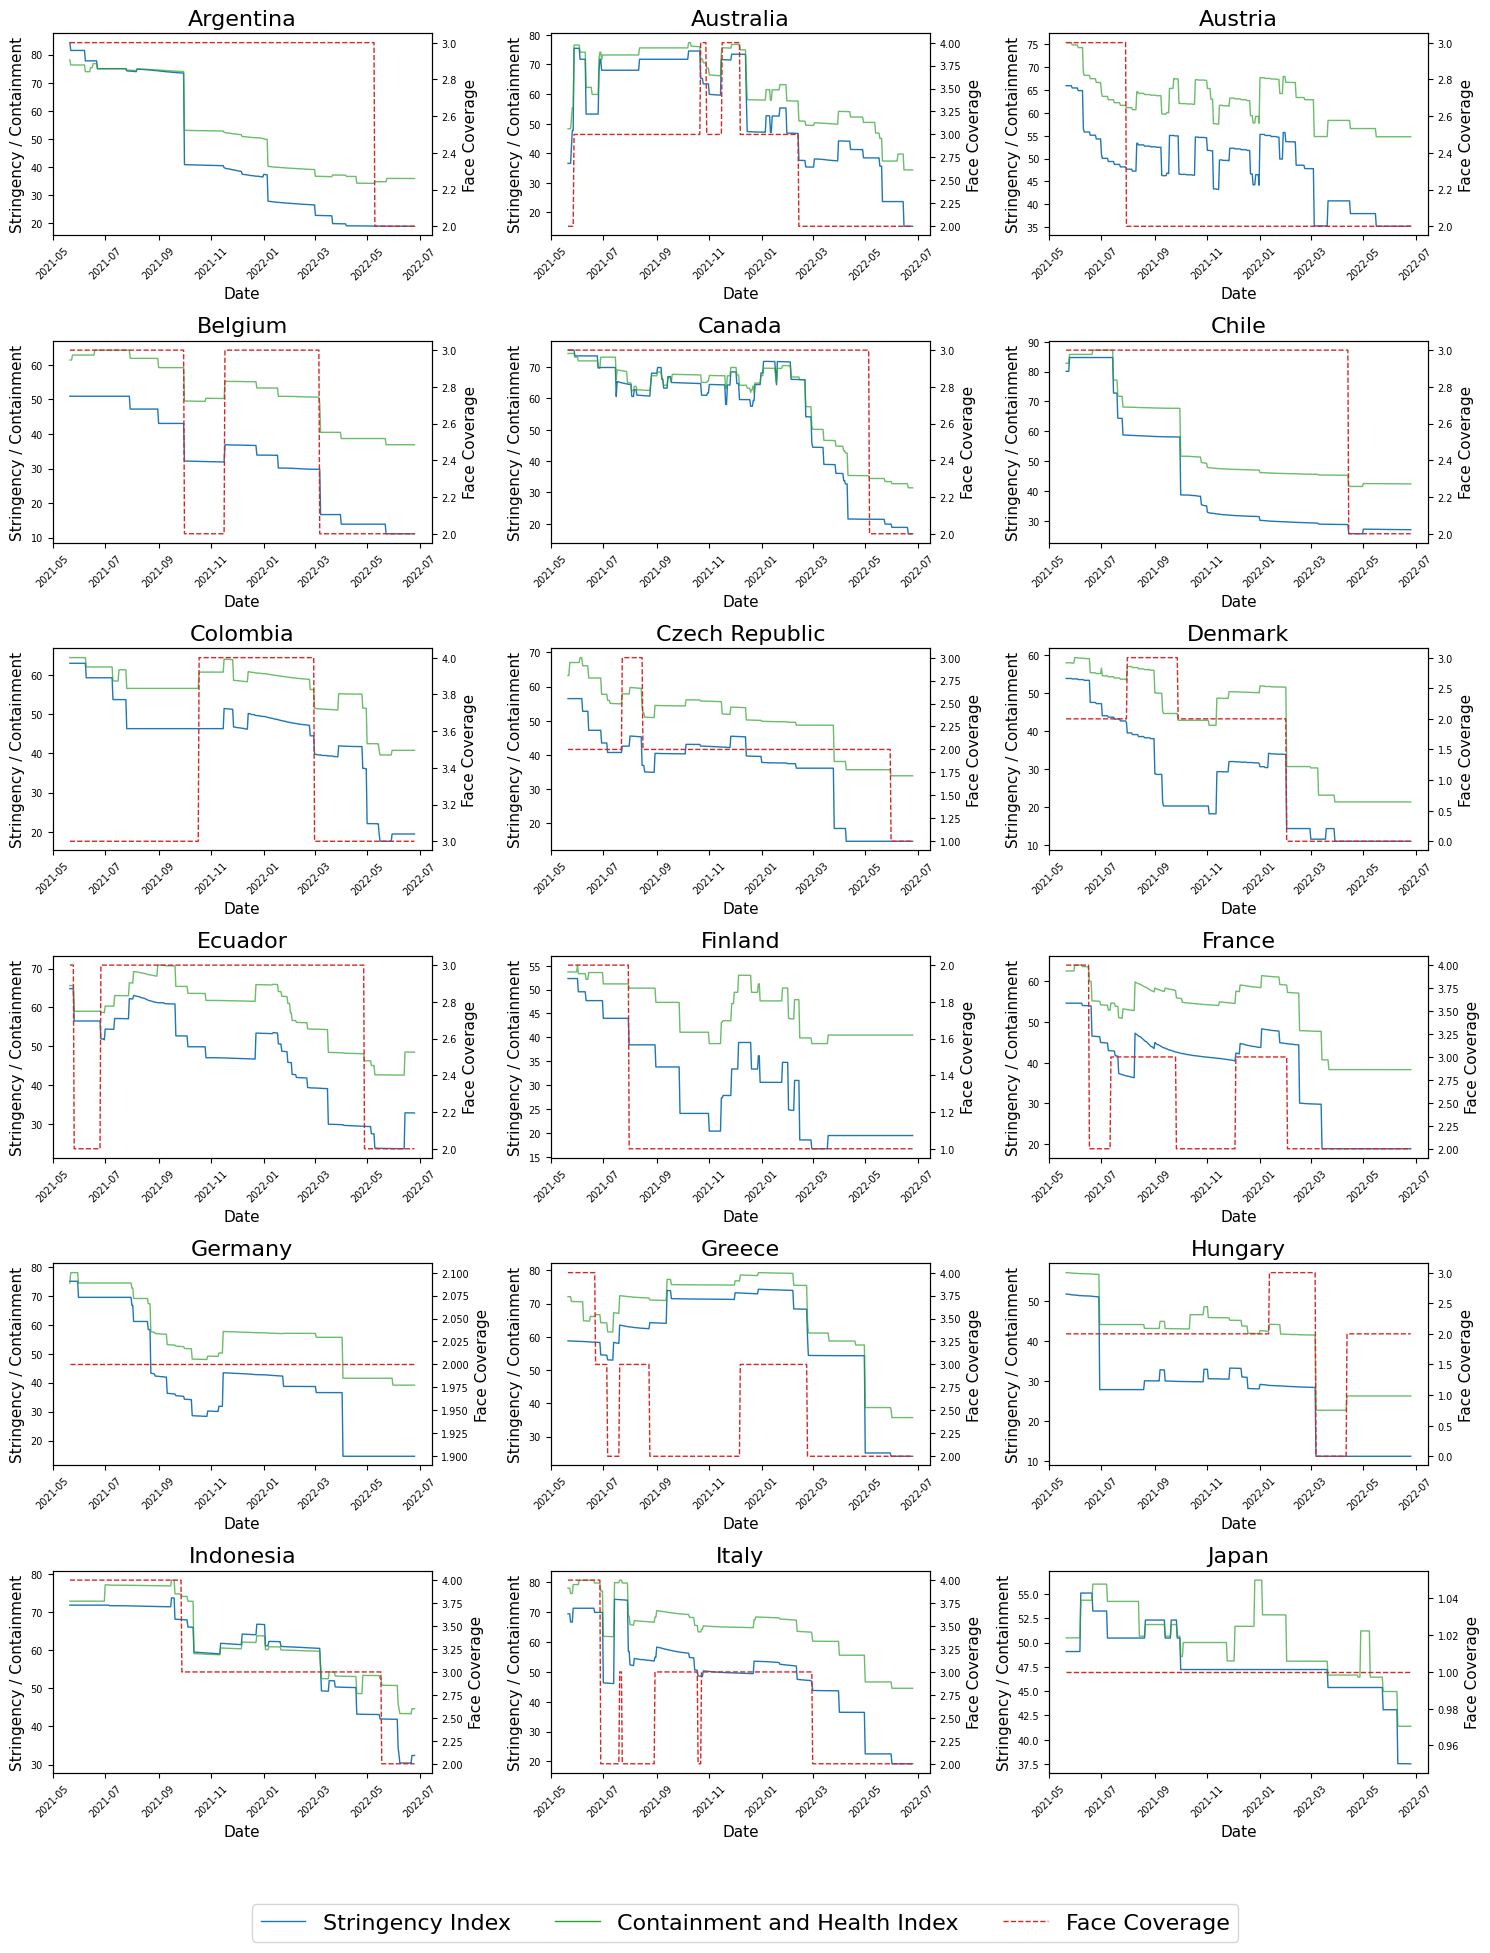

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lista dei paesi
countries = ['Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Germany',
 'Greece', 'Hungary', 'Indonesia', 'Italy', 'Japan' ]
n_countries = len(countries)

n_per_row = 3  # <-- Cambiato da 5 a 4
n_rows = int(np.ceil(n_countries / n_per_row))

plt.figure(figsize=(15, 20))  # leggermente più alta e larga

for idx, country in enumerate(countries, 1):
    dg_country = dg[dg["location"] == country]
    ds_country = ds[ds["Entity"] == country]
    dv_country = dv[dv["Entity"] == country]

    ax1 = plt.subplot(n_rows, n_per_row, idx)

    # Plot 1 - Stringency Index
    ax1.plot(
        pd.to_datetime(dg_country["date"]),
        dg_country["stringency_index"],
        color="tab:blue",
        label="Stringency Index",
        linewidth=1
    )
    # Plot 2 - Containment & Health Index
    ax1.plot(
        pd.to_datetime(dv_country["Day"]),
        dv_country["Containment health index (average)"],
        color="tab:green",
        label="Containment and Health Index",
        linewidth=1,
        alpha=0.7
    )

    # Secondo asse y per Face Coverage
    ax2 = ax1.twinx()
    ax2.plot(
        pd.to_datetime(ds_country["Day"]),
        ds_country["Facial Coverings"],
        color="tab:red",
        label="Face Coverage",
        linestyle="--",
        linewidth=1
    )

    ax1.set_title(country, fontsize=16)
    ax1.tick_params(axis='x', labelsize=7, rotation=45)
    ax1.tick_params(axis='y', labelsize=7)
    ax2.tick_params(axis='y', labelsize=7)

    # Etichette Y solo nella prima colonna
    ax1.set_ylabel('Stringency / Containment', fontsize=11)
    ax2.set_ylabel('Face Coverage', fontsize=11)
    ax1.set_xlabel('Date', fontsize=11)


# Legenda globale
lines = [
    plt.Line2D([0], [0], color='tab:blue', lw=1, label='Stringency Index'),
    plt.Line2D([0], [0], color='tab:green', lw=1, label='Containment and Health Index'),
    plt.Line2D([0], [0], color='tab:red', lw=1, linestyle='--', label='Face Coverage')
]
plt.figlegend(handles=lines, loc='lower center', ncol=3, fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.show()


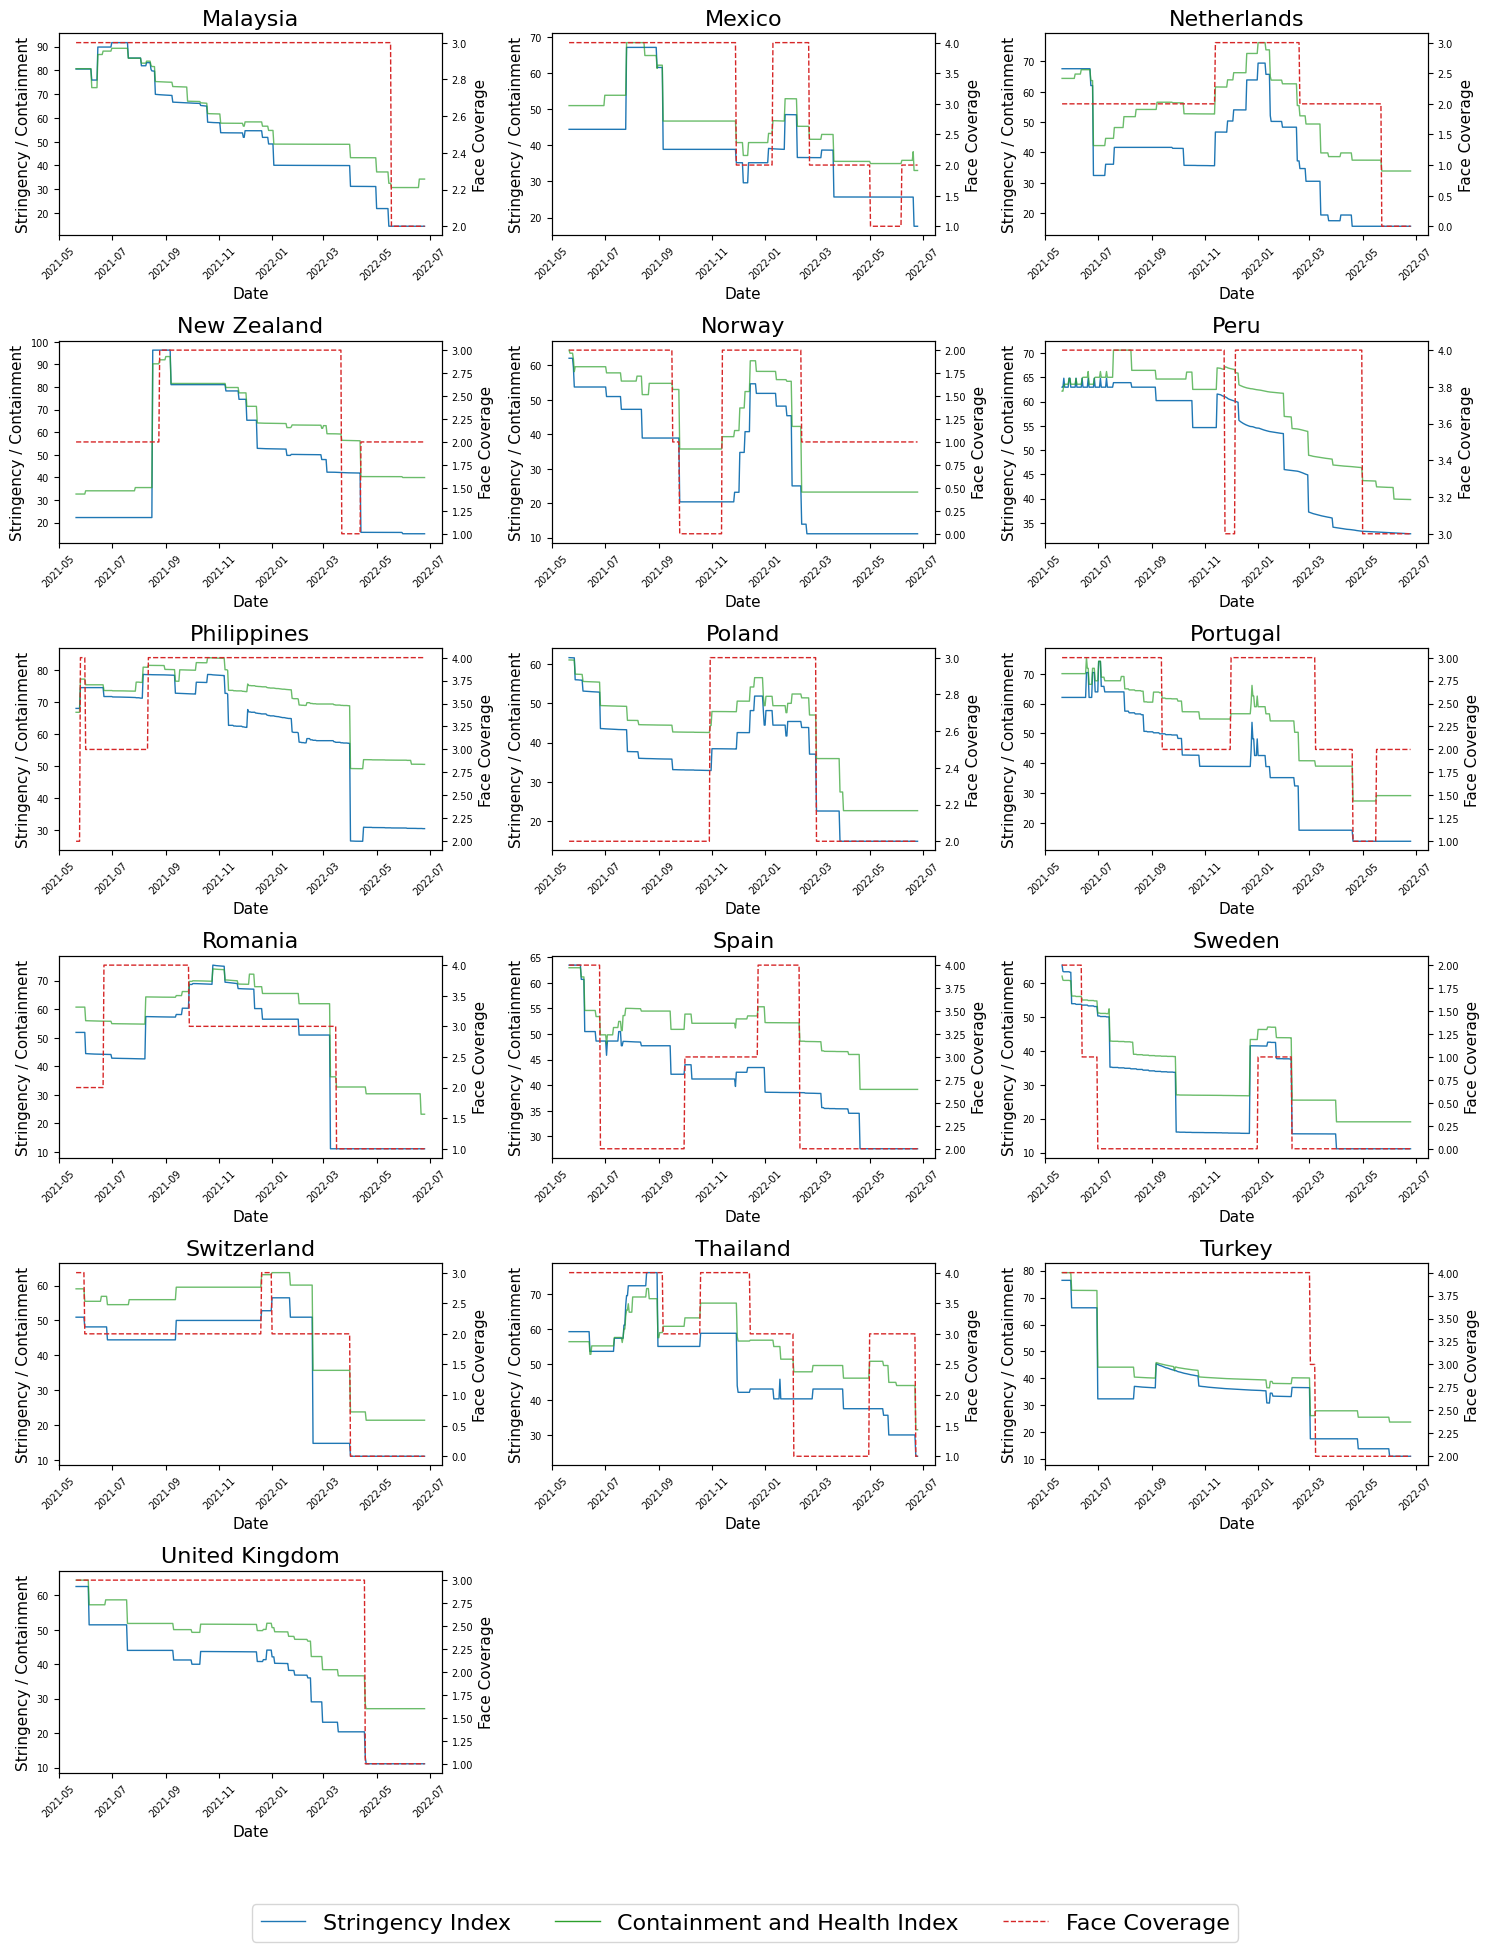

In [ ]:

countries = ['Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland',
 'Portugal', 'Romania', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'United Kingdom']
n_countries = len(countries)

n_per_row = 3 
n_rows = int(np.ceil(n_countries / n_per_row))
plt.figure(figsize=(15, 20)) 

for idx, country in enumerate(countries, 1):
    dg_country = dg[dg["location"] == country]
    ds_country = ds[ds["Entity"] == country]
    dv_country = dv[dv["Entity"] == country]

    ax1 = plt.subplot(n_rows, n_per_row, idx)

    # Plot 1 - Stringency Index
    ax1.plot(
        pd.to_datetime(dg_country["date"]),
        dg_country["stringency_index"],
        color="tab:blue",
        label="Stringency Index",
        linewidth=1
    )
    # Plot 2 - Containment & Health Index
    ax1.plot(
        pd.to_datetime(dv_country["Day"]),
        dv_country["Containment health index (average)"],
        color="tab:green",
        label="Containment and Health Index",
        linewidth=1,
        alpha=0.7
    )

    # Secondo asse y per Face Coverage
    ax2 = ax1.twinx()
    ax2.plot(
        pd.to_datetime(ds_country["Day"]),
        ds_country["Facial Coverings"],
        color="tab:red",
        label="Face Coverage",
        linestyle="--",
        linewidth=1
    )

    ax1.set_title(country, fontsize=16)
    ax1.tick_params(axis='x', labelsize=7, rotation=45)
    ax1.tick_params(axis='y', labelsize=7)
    ax2.tick_params(axis='y', labelsize=7)

    # Etichette Y solo nella prima colonna
    ax1.set_ylabel('Stringency / Containment', fontsize=11)
    ax2.set_ylabel('Face Coverage', fontsize=11)
    ax1.set_xlabel('Date', fontsize=11)


# Legenda globale
lines = [
    plt.Line2D([0], [0], color='tab:blue', lw=1, label='Stringency Index'),
    plt.Line2D([0], [0], color='tab:green', lw=1, label='Containment and Health Index'),
    plt.Line2D([0], [0], color='tab:red', lw=1, linestyle='--', label='Face Coverage')
]
plt.figlegend(handles=lines, loc='lower center', ncol=3, fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.show()

In [ ]:
full_data = pd.read_csv("csv/FULL_DATA4.csv")

#unisco il CHI a total test e le altre coonne che devo aggiungere 
dg_filtered['date'] = pd.to_datetime(dg_filtered['date']).dt.date
dv['Day'] = pd.to_datetime(dv['Day']).dt.date

dg_filtered = pd.merge(
    dg_filtered,
    dv[['Entity', 'Day', 'Containment health index (average)']],
    left_on=['location', 'date'],
    right_on=['Entity', 'Day'],
    how='left'  # Mantieni tutte le righe di dg_filtered anche senza corrispondenza
)

dg_filtered.rename(columns={'Containment health index (average)': 'Containment health index'}, inplace=True)
dg_filtered.drop(['Entity', 'Day'], axis=1, inplace=True)  # Rimuovi colonne temporanee
dg_filtered

,location,date,total_cases,total_tests,stringency_index,total_deaths,Containment health index
0,Argentina,2021-05-21,3429880.0,13586601.0,84.26,82322.0,78.10
1,Argentina,2021-05-22,3429880.0,13681398.0,81.48,82322.0,76.31
2,Argentina,2021-05-23,3664540.0,13729849.0,81.48,86838.0,76.31
3,Argentina,2021-05-24,3664540.0,13815092.0,81.48,86838.0,76.31
4,Argentina,2021-05-25,3664540.0,13896558.0,81.48,86838.0,76.31
...,...,...,...,...,...,...,...
16436,Vietnam,2022-06-21,10737640.0,NaN,25.93,43083.0,NaN
16437,Vietnam,2022-06-22,10737640.0,NaN,25.93,43083.0,NaN
16438,Vietnam,2022-06-23,10737640.0,NaN,25.93,43083.0,NaN
16439,Vietnam,2022-06-24,10737640.0,NaN,25.93,43083.0,NaN


In [ ]:
#ora unisco a FUll data
filtered_full_data['survey_date'] = pd.to_datetime(filtered_full_data['survey_date']).dt.date

# rinomina colonne
cols_to_add = ['total_cases', 'total_tests', 'total_deaths','Containment health index']
dg_selected = dg_filtered[['location', 'date'] + cols_to_add].rename(
    columns={'location': 'country', 'date': 'survey_date'}
)

# merge dei dataframes
full_data_merged = pd.merge(
    filtered_full_data,
    dg_selected,
    on=['country', 'survey_date'],
    how='left'
)


df_full = full_data_merged
#dg con colonne cambiate di nome per comodità
dg_renamed = dg.rename(columns={'location': 'country', 'date': 'survey_date'})

df_full['survey_date'] = pd.to_datetime(df_full['survey_date'], errors='coerce')
dg_renamed['survey_date'] = pd.to_datetime(dg_renamed['survey_date'], errors='coerce')
df_full['country'] = df_full['country'].str.strip().str.lower()
dg_renamed['country'] = dg_renamed['country'].str.strip().str.lower()

#indici da usare per entrambi i dataset sono le date e i paesi-> ci serve perchè usiamo join
df_full.set_index(['country', 'survey_date'], inplace=True)
dg_renamed.set_index(['country', 'survey_date'], inplace=True)

# aggiungere colonne
df_full = df_full.join(dg_renamed[['new_cases_smoothed', 'new_deaths_smoothed']], how='left')
df_full.reset_index(inplace=True) #toranno a essrere colonne normali e non idici

df_full['country'] = df_full['country'].str.title()
df_full.to_csv('csv/FULL_DATA5_FINALE.csv', index=False)
df_full

,country,survey_date,pct_mask,pct_worried_catch_covid,pct_belief_masking_effective,pct_received_news_local_health,pct_received_news_experts,pct_received_news_who,pct_received_news_govt_health,pct_received_news_politicians,...,pct_trust_covid_info_govt_health,pct_trust_covid_info_politicians,pct_trust_covid_info_journalists,pct_trust_covid_info_friends,total_cases,total_tests,total_deaths,Containment health index,new_cases_smoothed,new_deaths_smoothed
0,Argentina,2021-05-21,0.883037,0.842583,0.914011,0.397329,0.321977,0.164073,0.435724,0.264887,...,0.218241,0.064125,0.129780,0.299717,3429880.0,13586601.0,82322.0,78.10,23712.714,520.143
1,Argentina,2021-05-22,0.897337,0.836449,0.922906,0.412022,0.366311,0.185465,0.392395,0.263685,...,0.190801,0.056254,0.117624,0.274834,3429880.0,13681398.0,82322.0,76.31,23712.714,520.143
2,Argentina,2021-05-23,0.878700,0.820045,0.926571,0.401123,0.349691,0.184123,0.416509,0.250725,...,0.209455,0.060317,0.139199,0.263282,3664540.0,13729849.0,86838.0,76.31,33522.857,645.143
3,Argentina,2021-05-24,0.868005,0.850276,0.924137,0.412789,0.338874,0.192465,0.390328,0.234733,...,0.209091,0.042794,0.114550,0.287939,3664540.0,13815092.0,86838.0,76.31,33522.857,645.143
4,Argentina,2021-05-25,0.883632,0.826286,0.932578,0.420546,0.351768,0.221484,0.389583,0.219958,...,0.187467,0.048048,0.129039,0.263627,3664540.0,13896558.0,86838.0,76.31,33522.857,645.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32832,West Virginia,2022-06-21,0.190077,0.330420,0.508031,0.171094,0.191669,0.220399,0.195329,0.068475,...,0.222483,0.008701,0.046524,0.200708,NaN,NaN,NaN,NaN,NaN,NaN
32833,West Virginia,2022-06-22,0.178180,0.327251,0.527742,0.168757,0.182977,0.217487,0.203763,0.076120,...,0.235485,0.008160,0.049659,0.191459,NaN,NaN,NaN,NaN,NaN,NaN
32834,West Virginia,2022-06-23,0.182700,0.319211,0.539233,0.193929,0.202529,0.248436,0.220829,0.079134,...,0.237572,0.004804,0.039181,0.163282,NaN,NaN,NaN,NaN,NaN,NaN
32835,West Virginia,2022-06-24,0.187612,0.316179,0.540529,0.226515,0.222104,0.271527,0.229333,0.068401,...,0.228555,0.011300,0.047392,0.168546,NaN,NaN,NaN,NaN,NaN,NaN


## Ranking of countries by government interventions

In [18]:
#oxford github e leggi il file che c'è qui “A global panel database of pandemic policies (Oxford COVID-19 Government Response Tracker).” Nature Human Behaviour. https://doi.org/10.1038/s41562-021-01079-8
url = "https://github.com/OxCGRT/covid-policy-dataset/blob/main/data/OxCGRT_compact_national_v1.csv?raw=true"
df = pd.read_csv(url)
df.head()
#df.columns

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


questa versione mi serve per cancellare prima i paesi che non considero in modo da poter studaire il threshold per dividere in interventisti e non senza quegli stati

In [ ]:
#prendo le country che ho selezionato con facebook 
dl = pd.read_csv('csv/facebook_data_2021.csv')  
countries= dl['country'].unique().tolist()

df= df[df['CountryName'].isin(countries)]
# Conversione corretta del formato tipo 20210521 in datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Date'] = df['Date'].dt.date # rimuovo l'orario, tengo solo la data
df = df[(df['Date'] >= date(2021, 5, 21)) & (df['Date'] <= date(2022, 6, 25))]

cut_list=['Brazil', 'Egypt', 'Ukraine', 'Venezuela', 'Vietnam', 'Taiwan', 'India']
df = df[~df['CountryName'].isin(cut_list)]


In [20]:
# Qui ci sono i paesi, la media dei stringencyindex_average, il min e max per ogni paese. 
statistiche = df.groupby('CountryName')['ContainmentHealthIndex_Average'].agg(['mean', 'min', 'max']).reset_index()
statistiche.columns = ['CountryName', 'MeanCHI', 'MinCHI', 'MaxCHI'] # rinomina le colonne
mean_stringency = statistiche

print(mean_stringency.head())

  CountryName    MeanCHI  MinCHI  MaxCHI
0   Argentina  53.236085   34.23   78.10
1   Australia  61.977581   34.38   77.38
2     Austria  62.163092   54.76   75.34
3     Belgium  51.669327   36.90   64.29
4      Canada  59.114115   31.45   74.40


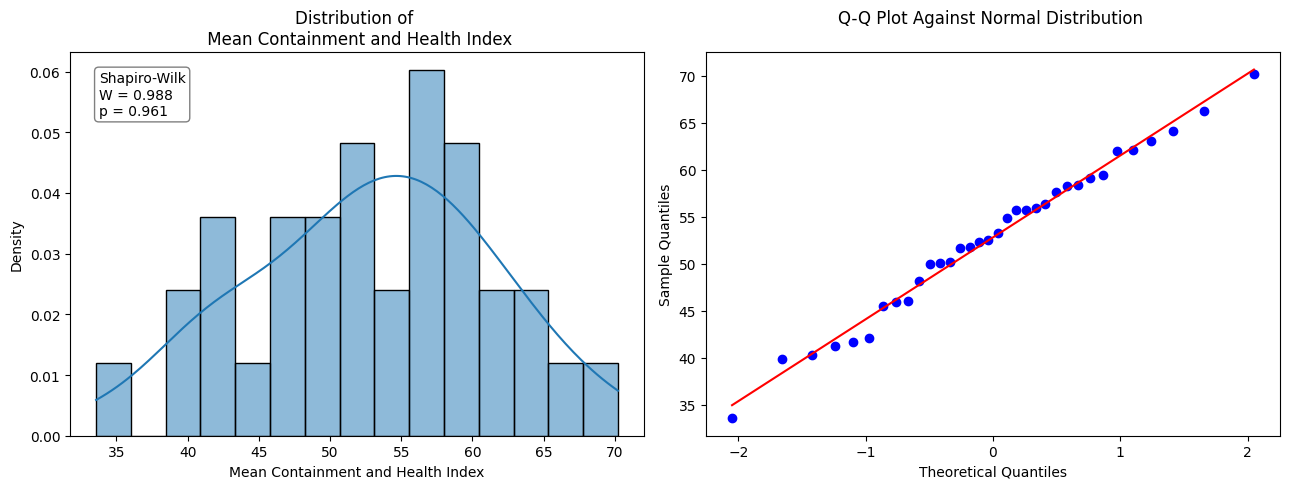

In [ ]:
# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(mean_stringency['MeanCHI'])

# Istogramma con curva di densità normale
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.histplot(mean_stringency['MeanCHI'], kde=True, stat='density', bins=15)
plt.title('Distribution of \n Mean Containment and Health Index')
plt.xlabel('Mean Containment and Health Index')
plt.ylabel('Density')

# Add Shapiro-Wilk result in the histogram
plt.annotate(
    f'Shapiro-Wilk\nW = {shapiro_stat:.3f}\np = {shapiro_p:.3f}',
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    ha='left',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray')
)
# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(mean_stringency['MeanCHI'], dist='norm', plot=plt)
plt.title('Q-Q Plot Against Normal Distribution \n')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

In [22]:
#Test Statistici per la Normalità: Shapiro-Wilk 
from scipy.stats import shapiro

stat, p_value = shapiro(mean_stringency['MeanCHI'])
print(f"Shapiro-Wilk Test: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Non possiamo rifiutare l'ipotesi nulla: la distribuzione è normale.")
else:
    print("Rifiutiamo l'ipotesi nulla: la distribuzione NON è normale.")

Shapiro-Wilk Test: p-value = 0.9608
Non possiamo rifiutare l'ipotesi nulla: la distribuzione è normale.


In [23]:
#skewness (asimmetria) e kurtosis (curtosi)
# skewness ≈ 0: distribuzione simmetrica (come una gaussiana) ->   < 0: coda a sinistra più lunga
# kurtosis ≈ 3: code simili a una normale.

from scipy.stats import skew, kurtosis

skewness = skew(mean_stringency['MeanCHI'])
kurt = kurtosis(mean_stringency['MeanCHI'])

print(f"Skewness: {skewness:.2f} (vicino a 0 = simmetria)")
print(f"Kurtosis: {kurt:.2f} (vicino a 3 = code normali)")

Skewness: -0.18 (vicino a 0 = simmetria)
Kurtosis: -0.45 (vicino a 3 = code normali)


In [24]:
# threshold per dividere i paesi in "interventisti" e "non interventisti"-> in questo caso uso la media di tutti i paesi del mio dataset perchè è una gaussiana
threshold = mean_stringency['MeanCHI'].mean()
print(threshold)
mean_stringency['Intervention'] = mean_stringency['MeanCHI'].apply(lambda x: 'interventista' if x >= threshold else 'non interventista')# Assegna label
print(mean_stringency.head())

52.81611706029045
  CountryName    MeanCHI  MinCHI  MaxCHI       Intervention
0   Argentina  53.236085   34.23   78.10      interventista
1   Australia  61.977581   34.38   77.38      interventista
2     Austria  62.163092   54.76   75.34      interventista
3     Belgium  51.669327   36.90   64.29  non interventista
4      Canada  59.114115   31.45   74.40      interventista


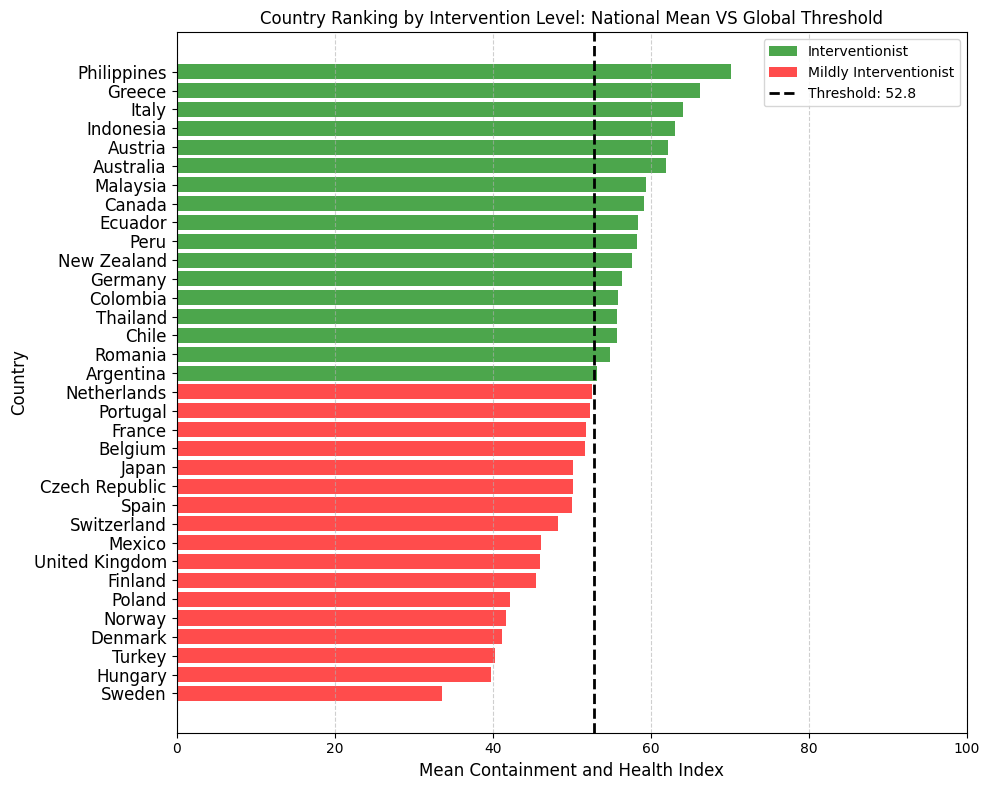

In [25]:

mean_stringency_sorted = mean_stringency.sort_values('MeanCHI') #ordina df
# crea un array di colori in base alla soglia
colors = np.where(mean_stringency_sorted['MeanCHI'] >= threshold, 'green', 'red')
labels = np.where(mean_stringency_sorted['MeanCHI'] >= threshold, 'Interventionist', 'Non Interventionist')

plt.figure(figsize=(10, 8))
bars = plt.barh(mean_stringency_sorted['CountryName'], 
                mean_stringency_sorted['MeanCHI'], 
                color=colors, 
                alpha=0.7)

# linea di soglia
plt.axvline(threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.1f}')
plt.xlim(0, 100)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='Interventionist'),
    Patch(facecolor='red', alpha=0.7, label='Mildly Interventionist'),
    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.1f}') 
]
plt.legend(handles=legend_elements)


plt.xlabel('Mean Containment and Health Index', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Country Ranking by Intervention Level: National Mean VS Global Threshold', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



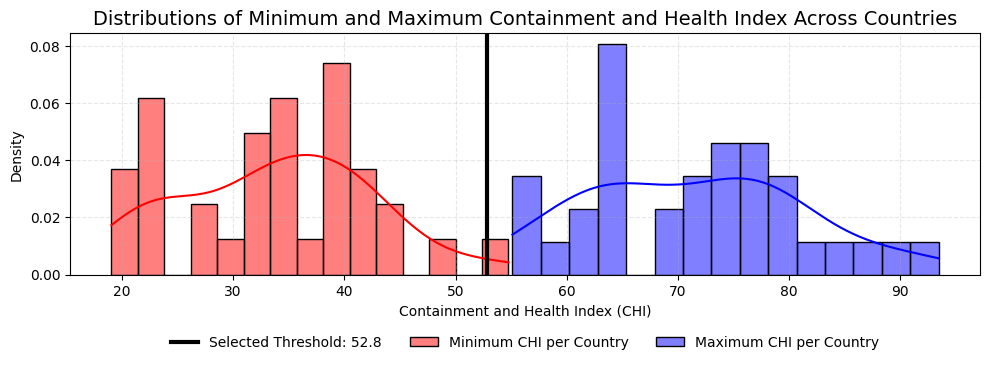

In [ ]:
plt.figure(figsize=(10, 4))

# Histogram for MinCHI (red)
sns.histplot(
    mean_stringency['MinCHI'], 
    color='red', 
    kde=True, 
    stat='density', 
    bins=15, 
    alpha=0.5, 
    label='Minimum CHI per Country'
)

# Histogram for MaxCHI (blue)
sns.histplot(
    mean_stringency['MaxCHI'], 
    color='blue', 
    kde=True, 
    stat='density', 
    bins=15, 
    alpha=0.5, 
    label='Maximum CHI per Country'
)

# Threshold line
plt.axvline(
    threshold, 
    color='black', 
    linestyle='-', 
    linewidth=3, 
    label=f'Selected Threshold: {threshold:.1f}'
)

plt.title('Distributions of Minimum and Maximum Containment and Health Index Across Countries', fontsize=14)
plt.xlabel('Containment and Health Index (CHI)')
plt.ylabel('Density')
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=3, 
    frameon=False
)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.subplots_adjust(bottom=0.3) 
plt.show()


In [ ]:
minsum=mean_stringency['MinCHI'].mean()
maxsum=mean_stringency['MaxCHI'].mean()
print(minsum)
print(maxsum)
mean_stringency.to_csv("csv/interventionCHI.csv", index=False, encoding="utf-8")

33.883823529411764
71.44205882352942


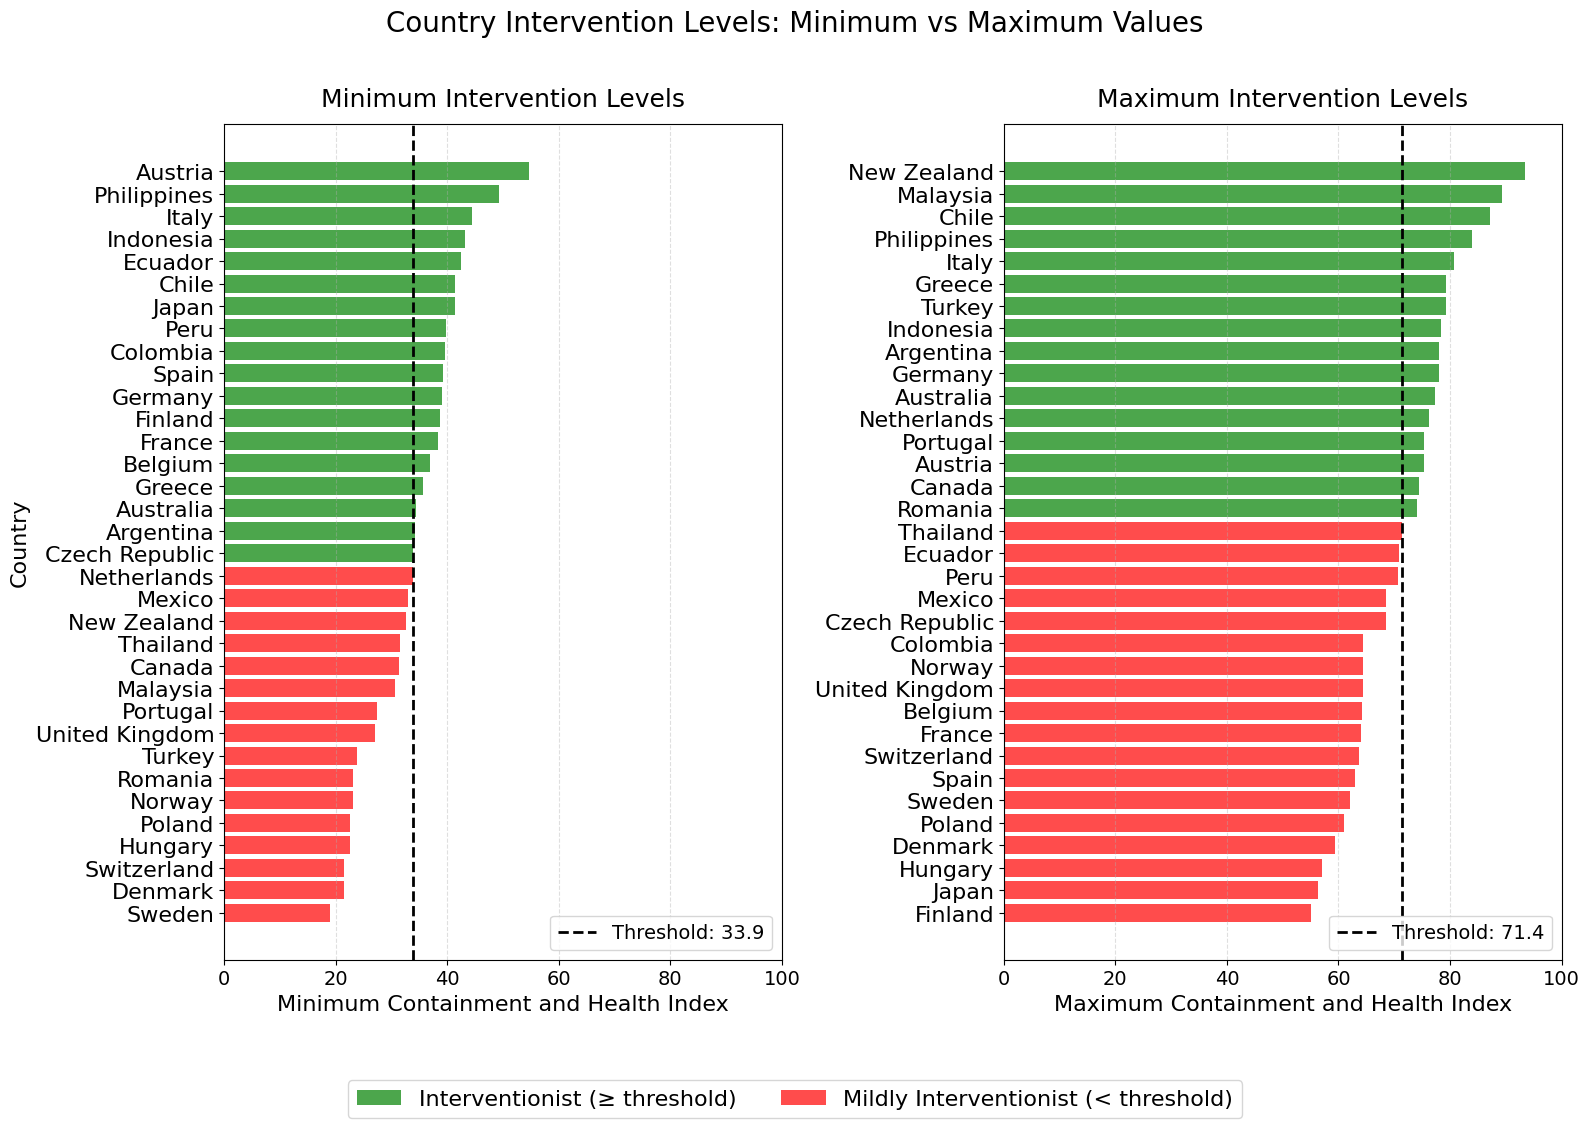

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Country Intervention Levels: Minimum vs Maximum Values', fontsize=20, y=1.02)

# Calcola le soglie
min_threshold = mean_stringency['MinCHI'].mean()
max_threshold = mean_stringency['MaxCHI'].mean()

# Ordina i dati
min_sorted = mean_stringency.sort_values('MinCHI')
max_sorted = mean_stringency.sort_values('MaxCHI')

country_fontsize = 16
axis_fontsize = 16

# Subplot 1: Valori Minimi
colors_min = np.where(min_sorted['MinCHI'] >= min_threshold, 'green', 'red')
ax1.barh(min_sorted['CountryName'], min_sorted['MinCHI'], color=colors_min, alpha=0.7, height=0.8)
ax1.axvline(min_threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold: {min_threshold:.1f}')
ax1.set_xlim(0, 100)
ax1.set_title('Minimum Intervention Levels', fontsize=18, pad=13)
ax1.set_xlabel('Minimum Containment and Health Index', fontsize=axis_fontsize)
ax1.set_ylabel('Country', fontsize=axis_fontsize)
ax1.tick_params(axis='y', labelsize=country_fontsize)
ax1.tick_params(axis='x', labelsize=14)
ax1.grid(axis='x', linestyle='--', alpha=0.4)
ax1.legend(loc='lower right', fontsize=14)  # Legenda individuale per ax1

# Subplot 2: Valori Massimi
colors_max = np.where(max_sorted['MaxCHI'] >= max_threshold, 'green', 'red')
ax2.barh(max_sorted['CountryName'], max_sorted['MaxCHI'], color=colors_max, alpha=0.7, height=0.8)
ax2.axvline(max_threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold: {max_threshold:.1f}')
ax2.set_xlim(0, 100)
ax2.set_title('Maximum Intervention Levels', fontsize=18, pad=13)
ax2.set_xlabel('Maximum Containment and Health Index', fontsize=axis_fontsize)
ax2.tick_params(axis='x', labelsize=14)
ax2.grid(axis='x', linestyle='--', alpha=0.4)
ax2.tick_params(axis='y', labelsize=country_fontsize)
ax2.legend(loc='lower right', fontsize=14)  # Legenda individuale per ax2

# Legenda unificata per i colori
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='Interventionist (≥ threshold)'),
    Patch(facecolor='red', alpha=0.7, label='Mildly Interventionist (< threshold)')
]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=16)

plt.tight_layout()

plt.show()